# **Food Delivery Time prediction and Analysis Using Machine Learning**

**Overview**: The food delivery time prediction model plays a crucial role in the food delivery industry, where prompt and accurate delivery is of utmost importance. Delivery time directly impacts customer satisfaction and influences their overall experience.

To develop an effective prediction model, we began by thoroughly cleaning the dataset, ensuring it was free from errors and inconsistencies. This step was vital in ensuring the reliability and accuracy of the model's predictions.


In [90]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [56]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd

# Define the path to the CSV file
file_path = '/content/drive/MyDrive/FoodDelivery/train.csv'

# Read the CSV file
df_train = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [59]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [60]:
# Checking for null values in the unmodified dataset

df_train.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [61]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [62]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


**Observations:**
1. There are null values present in Time_Orderd column.
2. Data Formatting will be required for Weatherconditions & Time_taken(min) column.
2. Both numerical & categorical features are present.
3. ID & Delivery_person_ID will not be used to build the model.

## Data Pre-Processing
---
### Data Cleaning

In [63]:
# Finding all types of null values, storing in set null_types

df_train = df_train.astype(str) # converting dataframe to string

null_types = set()

for column in df_train.columns:
  unique_vals = df_train[column].unique()
  for val in unique_vals:
    if 'nan' in val.lower():
      null_types.add(val)

print(null_types)

{'NaN ', 'conditions NaN'}


In [64]:
# Correcting null values to np.nan

for na_value in null_types:
  df_train.replace(na_value, np.nan, inplace = True)

In [65]:
# Counting null values again

df_train.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [66]:
# removing whitespaces from either sides

df_train = df_train.apply(lambda x: x.str.strip())
df_train.drop(columns= df_train.columns[0], inplace = True)

In [67]:
# Dropping rows containing null values

df_train.dropna(inplace = True)

In [68]:
#Update Column Names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)

update_column_name(df_train)
print(df_train.columns)

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)'],
      dtype='object')


In [69]:
#Extract relevant values from column
def extract_column_value(df):
    #Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]

extract_column_value(df_train)
df_train[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [70]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['Delivery_person_ID'],axis=1,inplace=True)

print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  20
After No. of columns:  19


In [71]:
#Check for Duplicate Values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [72]:
#Update datatypes
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

update_datatype(df_train)

In [73]:
#Check null values
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Age            0
Road_traffic_density           0
Time_taken(min)                0
City                           0
Festival                       0
multiple_deliveries            0
Type_of_vehicle                0
Type_of_order                  0
Vehicle_condition              0
Weather_conditions             0
Delivery_person_Ratings        0
Time_Order_picked              0
Time_Orderd                    0
Order_Date                     0
Delivery_location_longitude    0
Delivery_location_latitude     0
Restaurant_longitude           0
Restaurant_latitude            0
City_code                      0
dtype: int64

# EDA

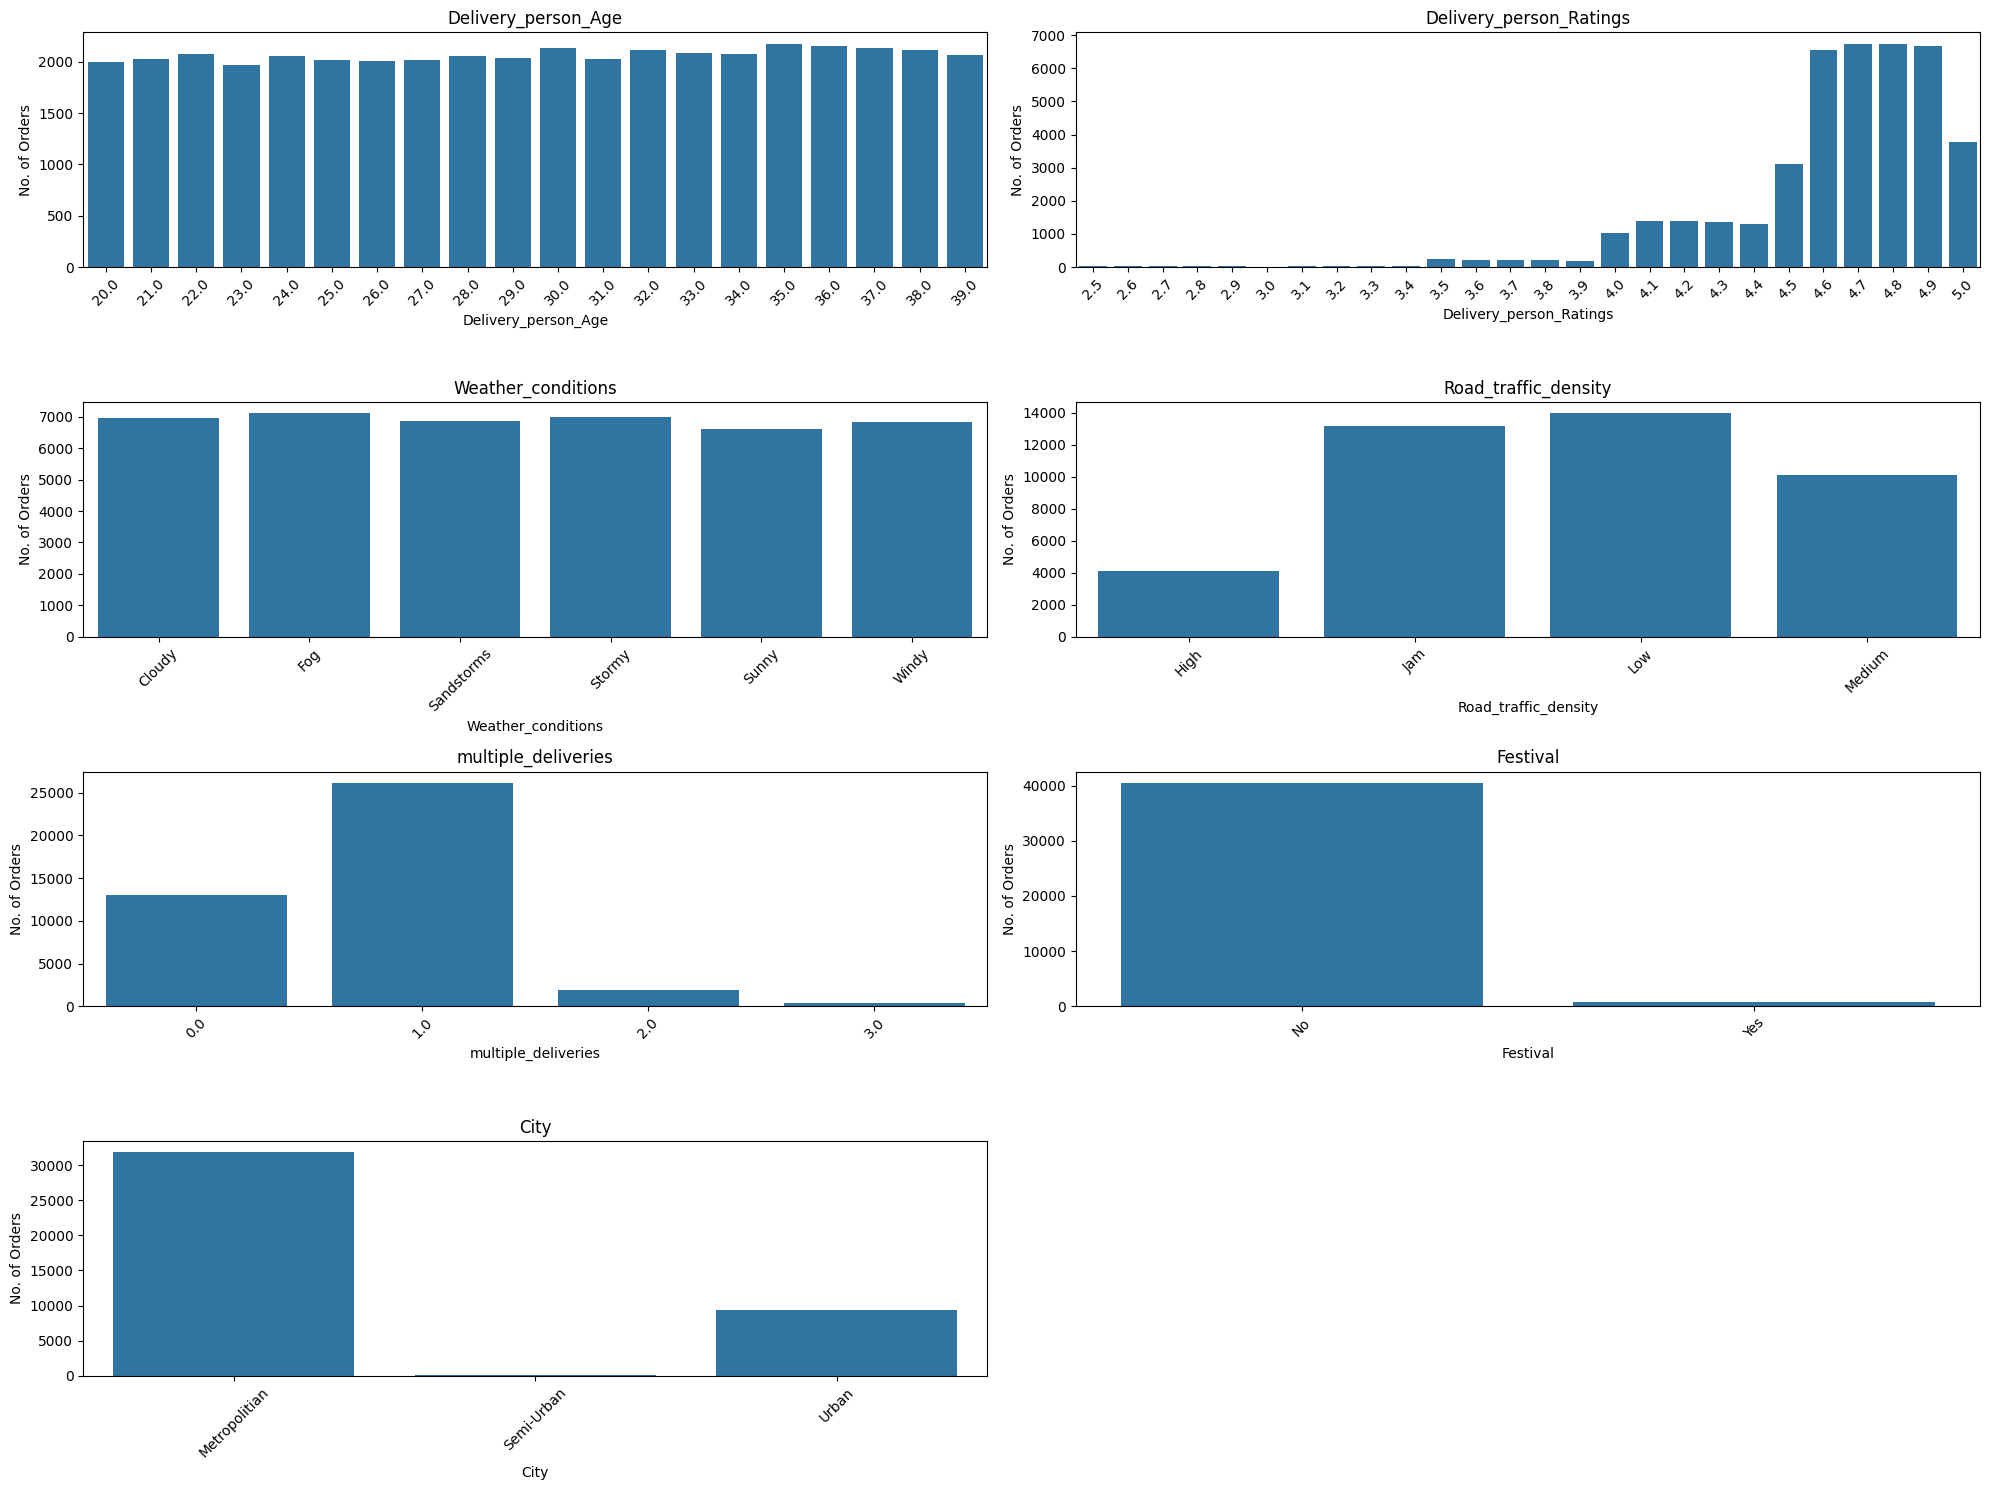

In [74]:
#Let's explore columns that have null values
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [75]:
#Handle null values
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)

handle_null_values(df_train)
df_train.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
City_code                      0
dtype: int64

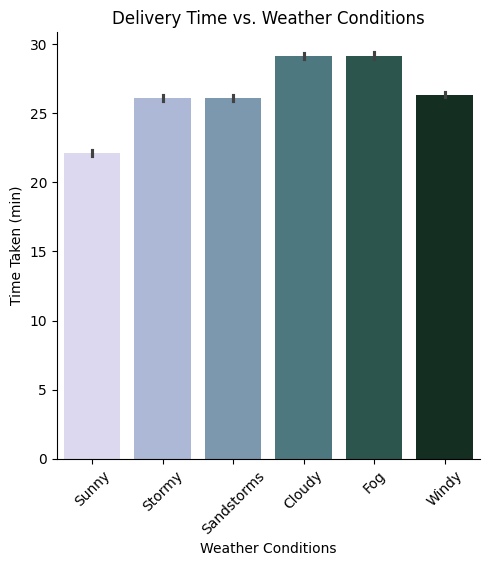

In [76]:
# 2. Catplot: Delivery Time v/s Weather Conditions
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(
    data=df_train,
    x="Weather_conditions",
    y="Time_taken(min)",
    kind="bar",
    palette="ch: 5"
)
# Enhance readability
plt.xlabel('Weather Conditions')
plt.ylabel('Time Taken (min)')
plt.title('Delivery Time vs. Weather Conditions')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary

plt.show()

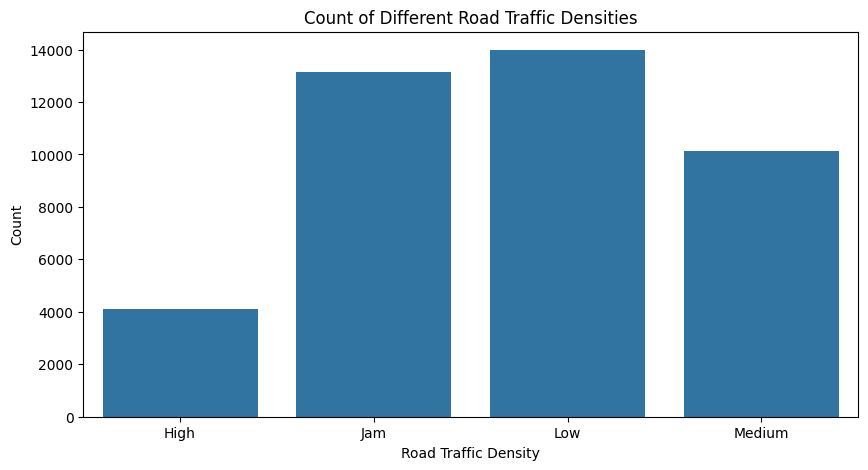

In [77]:
#3. Road_traffic_density
plt.figure(figsize=(10, 5))
sns.countplot(x='Road_traffic_density', data=df_train)
plt.xlabel('Road Traffic Density')
plt.ylabel('Count')
plt.title('Count of Different Road Traffic Densities')
plt.show()

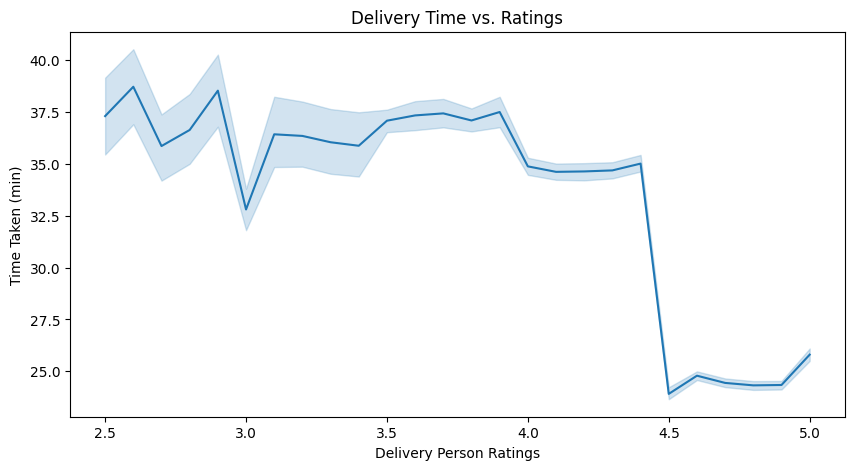

In [40]:
# 4. Delivery Time vs. Ratings

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="Time_taken(min)", data=df_train)
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken (min)')
plt.title('Delivery Time vs. Ratings')
plt.show()

#Feature Engineering

In [78]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.6784,12.924264,77.6884,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [79]:
import pandas as pd
import numpy as np

def calculate_time_diff(df):
    # Ensure 'Order_Date' is in datetime format
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])

    # Convert 'Time_Orderd' and 'Time_Order_picked' to timedelta
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

    # Create datetime columns for 'Time_Ordered' and 'Time_Picked'
    df['Time_Ordered'] = df['Order_Date'] + df['Time_Orderd']
    df['Time_Picked'] = df['Order_Date'] + df['Time_Order_picked']

    # Adjust 'Time_Picked' by adding one day if it is before 'Time_Ordered'
    df['Time_Picked'] = np.where(df['Time_Picked'] < df['Time_Ordered'],
                                df['Time_Picked'] + pd.DateOffset(days=1),
                                df['Time_Picked'])

    # Calculate the preparation time in minutes
    df['order_prepare_time'] = (df['Time_Picked'] - df['Time_Ordered']).dt.total_seconds() / 60

    # Handle null values in 'order_prepare_time' by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

    # Drop the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered', 'Time_Picked', 'Order_Date'], axis=1, inplace=True)

# Apply the function to your DataFrame
calculate_time_diff(df_train)
df_train.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.6784,12.924264,77.6884,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


In [80]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")

calculate_distance(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.6784,12.924264,77.6884,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6


# Model Building

In [81]:
# Create a copy of the df_train dataset
df_train_cleaned = df_train.copy()

In [82]:
# Drop unnecessary columns
columns_to_drop = [
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude',
    'City_code', "is_month_start", "is_month_end", "is_quarter_start", "is_quarter_end", "is_year_start", "is_year_end"
]

df_train_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')



In [83]:
# Combine order_prepare_time and distance into a single feature
df_train_cleaned['prepare_time_per_km'] = df_train_cleaned['order_prepare_time'] / (df_train_cleaned['distance'] + 1)  # Adding 1 to avoid division by zero


In [84]:
# Verify the columns after dropping unnecessary ones and combining features
print("Columns after dropping unnecessary ones and combining features:", df_train_cleaned.columns)

# Display the first few rows of the cleaned dataframe
df_train_cleaned.head()


Columns after dropping unnecessary ones and combining features: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'day', 'month', 'quarter', 'year', 'day_of_week',
       'is_weekend', 'order_prepare_time', 'distance', 'prepare_time_per_km'],
      dtype='object')


,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,month,quarter,year,day_of_week,is_weekend,order_prepare_time,distance,prepare_time_per_km
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,19,3,1,2022,5,1,15.0,3,3.750000
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,25,3,1,2022,4,0,5.0,20,0.238095
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,19,3,1,2022,5,1,15.0,1,7.500000
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,5,4,2,2022,1,0,10.0,7,1.250000
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,26,3,1,2022,5,1,15.0,6,2.142857


## Label Encoding

In [85]:

def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_train_cleaned)
df_train_cleaned.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,month,quarter,year,day_of_week,is_weekend,order_prepare_time,distance,prepare_time_per_km
0,37.0,4.9,4,0,2,3,1,0.0,0,2,24,19,3,1,2022,5,1,15.0,3,3.750000
1,34.0,4.5,3,1,2,3,2,1.0,0,0,33,25,3,1,2022,4,0,5.0,20,0.238095
2,23.0,4.4,2,2,0,1,1,1.0,0,2,26,19,3,1,2022,5,1,15.0,1,7.500000
3,38.0,4.7,4,3,0,0,1,1.0,0,0,21,5,4,2,2022,1,0,10.0,7,1.250000
4,32.0,4.6,0,0,1,3,2,1.0,0,0,30,26,3,1,2022,5,1,15.0,6,2.142857


In [86]:
# Verify the columns after dropping unnecessary ones and combining features
print("Columns after dropping unnecessary ones and combining features:", df_train_cleaned.columns)


Columns after dropping unnecessary ones and combining features: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'day', 'month', 'quarter', 'year', 'day_of_week',
       'is_weekend', 'order_prepare_time', 'distance', 'prepare_time_per_km'],
      dtype='object')


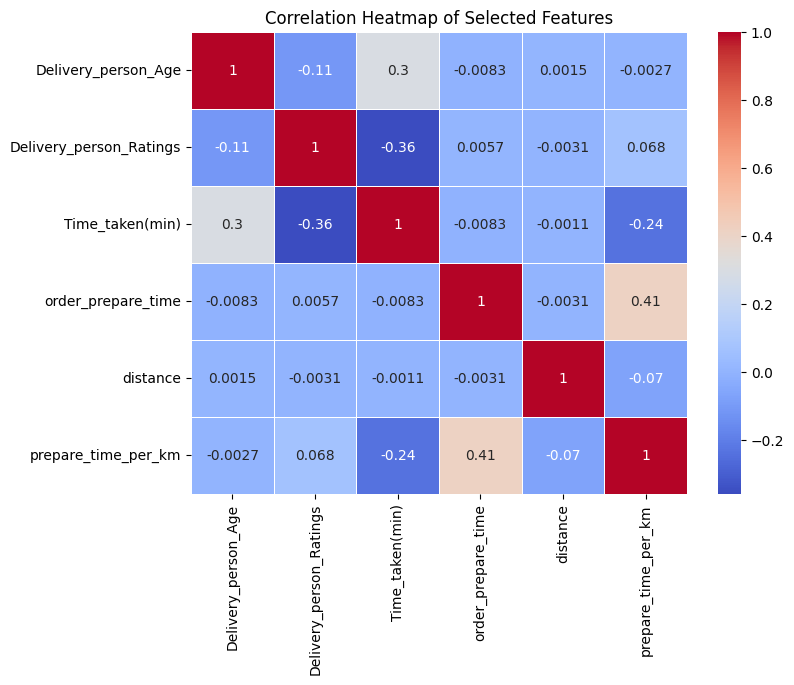

In [88]:
#Heatmap
columns_of_interest = [
    'Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken(min)',
    'order_prepare_time', 'distance', 'prepare_time_per_km'
]

# Compute the correlation matrix
correlation_matrix = df_train_cleaned[columns_of_interest].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


# Train test split

In [92]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Prepare features and labels
features = df_train_cleaned.drop('Time_taken(min)', axis=1)
label = df_train_cleaned['Time_taken(min)'].copy()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

# Convert categorical columns to numeric if necessary (One-hot Encoding for example)
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Align the columns in train and test data
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

# Check the shape of the features after encoding
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Define models
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

# Dictionary of models
models = {'Linear Regression': model_lr,
          'Random Forest Regression': model_rf,
          'Gradient Boosting Regressor': model_gbr,
          'Decision Tree Regressor': model_dtr}

# Evaluate models
for name, model in models.items():
    print(name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Training Accuracy: {:.2f}%".format(model.score(x_train, y_train) * 100))
    print("Testing Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))
    print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_test, y_pred))))

    # Cross-Validation Scores
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [sqrt(-score) for score in scores]
    print(f"Cross-Validation RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")

    print('--------------------------------------')

x_train shape: (28957, 19)
x_test shape: (12411, 19)
Linear Regression
Training Accuracy: 48.10%
Testing Accuracy: 48.34%
RMSE: 6.72
Cross-Validation RMSE: 6.73 ± 0.02
--------------------------------------
Random Forest Regression
Training Accuracy: 97.64%
Testing Accuracy: 83.22%
RMSE: 3.83
Cross-Validation RMSE: 3.85 ± 0.01
--------------------------------------
Gradient Boosting Regressor
Training Accuracy: 79.18%
Testing Accuracy: 79.09%
RMSE: 4.27
Cross-Validation RMSE: 4.30 ± 0.03
--------------------------------------
Decision Tree Regressor
Training Accuracy: 99.99%
Testing Accuracy: 68.29%
RMSE: 5.26
Cross-Validation RMSE: 5.24 ± 0.04
--------------------------------------


## Best Model - Random Forest Regressor
1. Lowest RMSE
2. Highest Testing Accuracy
3. Lowest Cross-Validation RMSE
4. Avoid Overfitting

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import pandas as pd
from math import sqrt

# Assuming x_train, x_test, y_train, y_test are already defined

# Define the RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model_rf.fit(x_train, y_train)

# Make predictions
y_pred = model_rf.predict(x_test)

# Print model evaluation metrics
print('Random Forest Regression')
print("Accuracy in training dataset: {:.2f}%".format(model_rf.score(x_train, y_train) * 100))
print("Accuracy in testing dataset: {:.2f}%".format(model_rf.score(x_test, y_test) * 100))

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R² Score: {:.2f}".format(r2))

# Create a DataFrame for actual vs predicted values
out = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Assuming df_train is your original DataFrame
out = df_train.loc[y_test.index].reset_index(drop=True).merge(out, left_index=True, right_index=True)

# Show a sample of the actual vs predicted values along with 'Delivery_person_Ratings'
print(out[['Delivery_person_Ratings', 'actual', 'predicted']].sample(10))


Random Forest Regression
Accuracy in training dataset: 97.64%
Accuracy in testing dataset: 83.15%
Mean Absolute Error (MAE): 3.06
Mean Squared Error (MSE): 14.73
Root Mean Squared Error (RMSE): 3.84
R² Score: 0.83
       Delivery_person_Ratings  actual  predicted
4674                       4.5      39      34.02
4672                       4.7      20      25.64
9097                       4.6      42      37.58
8455                       4.4      24      23.54
3114                       4.5      11      18.82
9248                       4.8      30      39.18
11146                      4.5      44      42.17
4108                       4.8      49      38.50
3751                       4.0      25      24.76
1475                       4.6      37      36.50


In [87]:
# Define and retrain the RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Ensure you use the same hyperparameters
model_rf.fit(x_train, y_train)  # Replace with your actual training data

# Save the model to a .pkl file
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
